In [5]:
import os
import time
import random
import shutil
import numpy as np
import pandas as pd
from PIL import Image

#import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torchvision
from torch import nn, optim
import torch.nn.functional as F
from torchvision import transforms
from torchvision.models import inception_v3
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from google.colab import drive

In [7]:
# Mount the drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
# Setting random seeds to enable consistency while testing.
random.seed(5)
np.random.seed(5)
torch.manual_seed(5)

In [9]:
# Choose the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
print('CUDA State:', torch.cuda.is_available())

CUDA State: True


## **Define The Root Path**

In [11]:
# Define the root folder to the dataset
root_folder = r"/content/drive/MyDrive/Siamese"

## **Organize the dataset**

In [12]:
def organize_train_data():

    '''
    A function to organize the training dataset. It creates for each person 2 folders, one folder for positive/anchor images and the other folder for negative images.
    Each image is renamed to be in the format of 'img_old_name_label.ext'.

    Args:
      None

    Returns:
      None
    '''


    # Open each parent folder (person)
    for person in ['A', 'B', 'C', 'D', 'E']:

        positive_path = root_folder + f"/person{person}/Train/Positive"
        negative_path = root_folder + f"/person{person}/Train/Negative"
        train_df = pd.read_csv(root_folder + f'/person{person}/Train/person{person}_SigVerificationTrainLabels.csv')       # Open csv file, in the train folder

        # Get training images & labels
        images = train_df['image_name']
        labels = train_df['label']

        # Create masks to get the respective data
        negative_mask = labels == 'forged'
        positive_mask = labels == 'real'


        # Check whether the specified path exists or not
        pos_Exist = os.path.exists(positive_path)
        neg_Exist = os.path.exists(negative_path)


        # If paths don't exist then create the directories, i.e create Positive & Negative folder for training data if they weren't not created
        if not pos_Exist:

            os.makedirs(positive_path)
            print("The Positive Class directory was created successfully!")

        if not neg_Exist:

            os.makedirs(negative_path)
            print("The Negative Class directory wass created successfully!")


        # If the Folder was created for the first time, then move the images to their respective folder
        positive_images = images[positive_mask]
        positive_labels = labels[positive_mask]

        for img_name, label in zip(positive_images, positive_labels):

            # Move Positive images & rename them
            root, ext = os.path.splitext(img_name)

            try:
                shutil.move(root_folder + f'/person{person}/Train/{img_name}', os.path.join(positive_path, f'{root}_{label}{ext}'))
            except:
                print(f"Image {img_name} wasn't found")



        # If the Folder was created for the first time, then move the images to their respective folder
        negative_images = images[negative_mask]
        negative_labels = labels[negative_mask]

        for img_name, label in zip(negative_images, negative_labels):

            # Move Negative images & rename them
            root, ext = os.path.splitext(img_name)

            try:
                shutil.move(root_folder + f'/person{person}/Train/{img_name}', os.path.join(negative_path, f'{root}_{label}{ext}'))
            except:
                print(f"Image {img_name} wasn't found")

In [13]:
def organize_test_data():

    '''
    A function to organize the test dataset. Each test image is renamed to be in the format of 'img_old_name_label.ext'.

    Args:
      None

    Returns:
      None
    '''


    # Open each parent folder (person)
    for person in ['A', 'B', 'C', 'D', 'E']:

        # Open csv file, in the test folder
        test_df = pd.read_csv(root_folder + f'/person{person}/Test/person{person}_SigVerificationTestLabels.csv')

        # Get test images & labels
        images = test_df['image_name']
        labels = test_df['label']

        # Rename images to have the following convention: old_name_label.old_ext
        for img_name, label in zip(images, labels):

            root, ext = os.path.splitext(img_name)

            try:
                new_name = root + '_' + f'{label}' + ext
                shutil.move(root_folder + f'/person{person}/Test/{img_name}', f'Siamese/person{person}/Test/{new_name}')
            except:
                print(f"Image {img_name} wasn't found")

In [14]:
organize_train_data()

Image personA_9.png wasn't found
Image personA_15.png wasn't found
Image personA_6.png wasn't found
Image personA_36.png wasn't found
Image personA_41.png wasn't found
Image personA_44.png wasn't found
Image personA_8.png wasn't found
Image personA_23.png wasn't found
Image personA_4.png wasn't found
Image personA_22.png wasn't found
Image personA_17.png wasn't found
Image personA_7.png wasn't found
Image personA_43.png wasn't found
Image personA_26.png wasn't found
Image personA_38.png wasn't found
Image personA_46.png wasn't found
Image personA_25.png wasn't found
Image personA_39.png wasn't found
Image personA_35.png wasn't found
Image personA_19.png wasn't found
Image personA_37.png wasn't found
Image personA_3.png wasn't found
Image personA_28.png wasn't found
Image personA_31.png wasn't found
Image personA_48.png wasn't found
Image personA_1.png wasn't found
Image personA_14.png wasn't found
Image personA_30.png wasn't found
Image personA_32.png wasn't found
Image personA_18.png 

In [15]:
organize_test_data()

Image personA_2.png wasn't found
Image personA_42.png wasn't found
Image personA_33.png wasn't found
Image personA_20.png wasn't found
Image personA_29.png wasn't found
Image personA_13.png wasn't found
Image personA_27.png wasn't found
Image personA_10.png wasn't found
Image personB_2.png wasn't found
Image personB_42.png wasn't found
Image personB_33.png wasn't found
Image personB_20.png wasn't found
Image personB_29.png wasn't found
Image personB_13.png wasn't found
Image personB_27.png wasn't found
Image personB_10.png wasn't found
Image personC_13.png wasn't found
Image personC_19.png wasn't found
Image personC_6.png wasn't found
Image personC_39.png wasn't found
Image personC_32.png wasn't found
Image personC_34.png wasn't found
Image personC_8.png wasn't found
Image personC_17.png wasn't found
Image personD_26.png wasn't found
Image personD_41.png wasn't found
Image personD_15.png wasn't found
Image personD_14.png wasn't found
Image personD_31.png wasn't found
Image personD_21.p

## **Create Triplets**

In [16]:
def create_train_triplets():

    '''
    A function to create list of train triplets in the form of (anchor_img, positive_img, negative_img). Each image in the triplet set is stored as its full path.
    These triplets will be used for training set.

    Args:
      None

    Returns:
      triplets (list): A list containing tuples of triplets in the form of (anchor_img, positive_img, negative_img).
    '''

    # Create triplets for training
    triplets = []

    # For each person, form all possible sets of triplets
    for person in ['A', 'B', 'C', 'D', 'E']:

        positive_path = root_folder + f"/person{person}/Train/Positive"
        negative_path = root_folder + f"/person{person}/Train/Negative"

        positive_files = os.listdir(positive_path)
        negative_files = os.listdir(negative_path)

        # Iterate through all possible positive images
        for idx, positive in enumerate(positive_files):

            # Iterate through all possible anchor images
            for anchor in positive_files[idx+1:]:

                # Iterate through all possible negative images
                for negative in negative_files:

                    # Store the formed triplet set
                    triplets.append((os.path.join(positive_path, anchor), os.path.join(positive_path, positive), os.path.join(negative_path, negative)))


    return triplets

In [17]:
def create_test_triplets():

    '''
    A function to create list of test triplets in the form of (anchor_img, positive_img, negative_img). Each image in the triplet set is stored as its full path.
    These triplets will be used for test set.

    Args:
      None

    Returns:
      triplets (list): A list containing tuples of triplets in the form of (anchor_img, positive_img, negative_img).
    '''

    # Create triplets for testing
    triplets = []


    # For each person, form all possible sets of triplets
    for person in ['A', 'B', 'C', 'D', 'E']:

        image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp')
        files = os.listdir(root_folder + f'/person{person}/Test/')
        image_files = [f for f in files if f.lower().endswith(image_extensions)]           # Store the names of the images in the folder


        # Separate the positive and negative images
        positive_images = [image for image in image_files if image.split('_')[-1].split('.')[0] == 'real']
        negative_images = [image for image in image_files if image.split('_')[-1].split('.')[0] == 'forged']


        # Iterate through all possible positive images
        for idx, positive in enumerate(positive_images):

            # Iterate through all possible anchor images
            for anchor in positive_images[idx+1:]:

                # Iterate through all possible negative images
                for negative in negative_images:

                    root = root_folder + f'/person{person}/Test'                # Get the path of the parent folder of the images
                    triplets.append((os.path.join(root, anchor), os.path.join(root, positive), os.path.join(root, negative)))       # Store the formed triplet set


    return triplets

In [18]:
# Form Train & Test triplets
train_triplets = create_train_triplets()
test_triplets = create_test_triplets()

In [19]:
# Verify the counts
print('Length of train triplets:', len(train_triplets))
print('Length of test triplets:', len(test_triplets))

Length of train triplets: 19000
Length of test triplets: 120


## **Create DataLoaders**

In [20]:
class CustomData(Dataset):

    def __init__(self, triplets, transform=None):
        self.triplets = triplets
        self.transform = transform
        self.labels_encoded = {'real': 1, 'forged': 0}              # Get dictionary to encode the classes from string to integer


    def __len__(self):
        return len(self.triplets)


    def __getitem__(self, idx):

        # Ensure idx is a tensor
        if not isinstance(idx, torch.Tensor):
            idx = torch.tensor(idx)

        # Get positive, anchor, and negative paths
        pos, anch, neg = self.triplets[idx]

        # Get images labels
        pos_label = pos.split('_')[-1].split('.')[0]
        anch_label = anch.split('_')[-1].split('.')[0]
        neg_label = neg.split('_')[-1].split('.')[0]
        pos_label, anch_label, neg_label = self.labels_encoded[pos_label], self.labels_encoded[anch_label], self.labels_encoded[neg_label]

        # Load images using PIL
        pos_img = Image.open(pos).convert("RGB")
        anch_img = Image.open(anch).convert("RGB")
        neg_img = Image.open(neg).convert("RGB")


        # Apply transformations if provided
        if self.transform:
            pos_img = self.transform(pos_img)
            anch_img = self.transform(anch_img)
            neg_img = self.transform(neg_img)


        return (pos_img, pos_label), (anch_img, anch_label), (neg_img, neg_label)

In [21]:
transform = transforms.Compose([
                                transforms.Resize((299, 299)),
                                transforms.ToTensor(),  # Convert image to Tensor
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize based on ImageNet stats
                               ])

In [22]:
# Create Train & Test Datasets
train_dataset = CustomData(train_triplets, transform=transform)
test_dataset = CustomData(test_triplets, transform=transform)

In [23]:
# Create Train & Test DataLoaders (Divide to batches)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [24]:
print('Size of the Train Dataset:', len(train_dataset))
print('Size of the Test Dataset:', len(test_dataset))

Size of the Train Dataset: 19000
Size of the Test Dataset: 120


In [25]:
sample_batch = next(iter(test_dataloader))

print('Length of the Test Batch:', len(sample_batch))
print('First Element of the Test Batch:\n', sample_batch[0])
print('Second Element of the Test Batch:\n', sample_batch[1])
print('Third Element of the Test Batch:\n', sample_batch[2])

Length of the Test Batch: 3
First Element of the Test Batch:
 [tensor([[[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],

         [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          ...,
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

         [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2.64

In [26]:
sample_batch = next(iter(train_dataloader))

print('Length of the Train Batch:', len(sample_batch))
print('First Element of the Train Batch:\n', sample_batch[0])
print('Second Element of the Train Batch:\n', sample_batch[1])
print('Third Element of the Train Batch:\n', sample_batch[2])

Length of the Train Batch: 3
First Element of the Train Batch:
 [tensor([[[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],

         [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          ...,
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

         [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2.

## **Create The Model**

In [27]:
class Encoder(nn.Module):

    def __init__(self):

        super(Encoder, self).__init__()

        # Use Inception as base model & remove the final fully connected layer, i.e Keep everything except the classifier
        self.base = inception_v3(weights='IMAGENET1K_V1')
        self.base.fc = nn.Identity()
        self.base.AuxLogits = nn.Identity()  # Remove auxiliary logits

        # Freeze weights of all layers
        for param in self.base.parameters():
            param.requires_grad = False

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(2048, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)


    def forward(self, x):

        '''
        Function to form the forward path. It should extract the embeddings of the passed image.

        Args:
          x : The image we want to pass to our model.

        Returns:
          y : The extracted embeddings of the passed image.
        '''

        x = self.base(x)

        # In case of auxiliary logits, only use the main output
        if isinstance(x, tuple):
            x = x[0]  # Extract the main logits (if auxiliary logits were used)

        #print("After base:", x.shape)  # Should be [B, 2048, 1, 1]

        x = self.flatten(x)
        #print("After flatten:", x.shape)  # Should be [B, 2048]

        x = F.relu(self.bn1(self.fc1(x)))
        #print("After fc1+bn1:", x.shape)  # Should be [B, 512]

        x = F.relu(self.fc2(x))
        #print("After fc2:", x.shape)  # Should be [B, 256]

        return F.normalize(x, p=2, dim=1)

In [28]:
class DistanceLayer(nn.Module):

    def forward(self, anchor, positive, negative):

        '''
        Function to get the distance between the (positive, anchor) pairs and the (anchor, negative) pairs.

        Args:
          anchor: The anchor image embeddings array.
          positive: The positive image embeddings array.
          negative: The negative image embeddings array.

        Returns:
          ap_distance: Euclidean distance between anchor and positive embeddings.
          an_distance: Euclidean distance between anchor and negative embeddings.
        '''

        ap_distance = F.pairwise_distance(anchor, positive, p=2)
        an_distance = F.pairwise_distance(anchor, negative, p=2)

        return ap_distance, an_distance

In [29]:
class SiameseNetwork(nn.Module):

    def __init__(self, encoder):
        super(SiameseNetwork, self).__init__()
        self.encoder = encoder
        self.distance = DistanceLayer()

    def forward(self, anchor, positive, negative):

        '''
        Function to extract the embeddings for anchor, positive, and negative images, and get the distance between the (positive, anchor) pairs and the (anchor, negative) pairs.

        Args:
          anchor: The anchor image array.
          positive: The positive image array.
          negative: The negative image array.

        Returns:
          ap_distance: Euclidean distance between anchor and positive embeddings.
          an_distance: Euclidean distance between anchor and negative embeddings.
        '''

        encoded_anchor = self.encoder(anchor)
        encoded_positive = self.encoder(positive)
        encoded_negative = self.encoder(negative)

        return self.distance(encoded_anchor, encoded_positive, encoded_negative)

In [30]:
def triplet_loss(ap_distance, an_distance, margin=1.0):
    '''
    Function to get the loss between the distance between the (positive, anchor) pairs and the (anchor, negative) pairs with some margin.

    Args:
      ap_distance: Euclidean distance between anchor and positive embeddings.
      an_distance: Euclidean distance between anchor and negative embeddings.
      margin: The margin we will allow in our loss. As margin increases the boundary between the ap_distance and an_distance will increase.

    Returns:
      loss: The loss between ap_distance and an_distance with some margin.
    '''
    return torch.mean(torch.clamp(ap_distance - an_distance + margin, min=0.0))

In [31]:
def train_siamese(model, train_loader, epochs=10, lr=1e-4, margin=1.0):

    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Train the model for a number of epochs
    for epoch in range(epochs):

        print(f"Epoch {epoch+1}/{epochs} Started")

        # Set the model to training mode
        model.train()
        running_loss = 0.0

        # Extract the anchor, positive and negative sets for the current batch
        for (a, _), (p, _), (n, _) in train_loader:

            a, p, n = a.to(device), p.to(device), n.to(device)

            optimizer.zero_grad()

            # Extract embeddings and calculate the loss
            ap_dist, an_dist = model(a, p, n)
            loss = triplet_loss(ap_dist, an_dist, margin)

            # Perform backward propagation
            loss.backward()

            # Update the weights
            optimizer.step()

            # Accumulate the loss for the current epoch
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{epochs} Finished, Train Loss: {avg_train_loss:.4f}")

In [32]:
def evaluate_siamese(model, data_loader, margin=1.0):

    # Set the model to the evaluation mode
    model.eval()

    total_loss = 0.0
    correct = 0
    total = 0

    y_true = []
    y_pred = []


    # Stop tracking the gradients
    with torch.no_grad():


        # Extract the anchor, positive and negative sets for the current batch
        for (a, _), (p, _), (n, _) in data_loader:

            a, p, n = a.to(device), p.to(device), n.to(device)

            # Extract embeddings and calculate the loss
            ap_dist, an_dist = model(a, p, n)
            loss = triplet_loss(ap_dist, an_dist, margin)
            total_loss += loss.item()

            # Evaluate if the difference meets the margin condition
            correct_preds = ((an_dist - ap_dist) >= margin).cpu().numpy()
            correct += correct_preds.sum()
            total += len(correct_preds)

            # Confusion matrix: assume true labels are always 1 (positives should be closer)
            y_true.extend([1] * len(correct_preds))
            y_pred.extend(correct_preds.astype(int))


    avg_loss = total_loss / len(data_loader)
    accuracy = correct / total * 100
    print(f"Validation/Test Loss: {avg_loss:.4f} | Accuracy (with margin): {accuracy:.2f}%")

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Wrong", "Correct"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix (Margin ≥ {margin})")
    plt.show()

    return avg_loss, accuracy

## **Test**

In [ ]:
# Instantiate the Model
encoder = Encoder()
model = SiameseNetwork(encoder).to(device)

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 197MB/s] 


In [ ]:
# Train the model
train_siamese(model, train_dataloader, epochs=10, lr=1e-4, margin=1.0)

Epoch 1/10 Started
Epoch 1/10 Finished, Train Loss: 0.3048
Epoch 2/10 Started
Epoch 2/10 Finished, Train Loss: 0.0073
Epoch 3/10 Started
Epoch 3/10 Finished, Train Loss: 0.0034
Epoch 4/10 Started
Epoch 4/10 Finished, Train Loss: 0.0030
Epoch 5/10 Started
Epoch 5/10 Finished, Train Loss: 0.0022
Epoch 6/10 Started
Epoch 6/10 Finished, Train Loss: 0.0022
Epoch 7/10 Started
Epoch 7/10 Finished, Train Loss: 0.0012
Epoch 8/10 Started
Epoch 8/10 Finished, Train Loss: 0.0015
Epoch 9/10 Started
Epoch 9/10 Finished, Train Loss: 0.0017
Epoch 10/10 Started
Epoch 10/10 Finished, Train Loss: 0.0013


Validation/Test Loss: 0.0005 | Accuracy (with margin): 99.17%


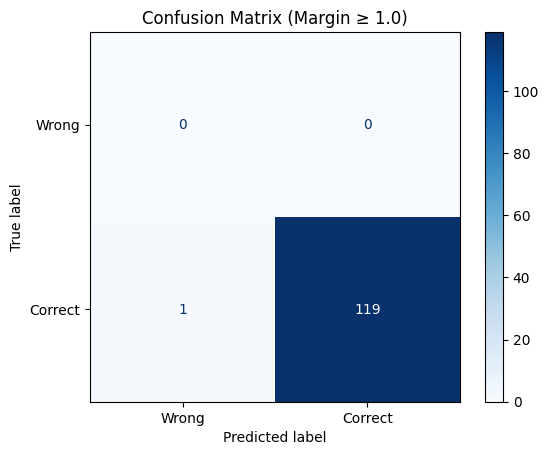

(0.00045772455632686615, np.float64(99.16666666666667))

In [ ]:
# Evaluate on test set
evaluate_siamese(model, test_dataloader, margin=1.0)

In [ ]:
# Save the model
torch.save(model.state_dict(), 'siamese_model.pth')